In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy import stats

from dirichlet_gaussian_mixture import DirichletGaussianMixtureSampler

plt.rcParams["figure.figsize"] = (14,5)

# Dirichlet Gaussian Mixture

## Create the some data

In [4]:
# Set the params to generate the data.
prior_cov = np.eye(2) * 7
prior_mean = np.zeros(2)
likelihood_cov = np.eye(2) * 0.5
alpha = 4

In [5]:
# Generate the clusters
z = [1]
N = 1000
for n in range(1, N):
    probs = [x / (n + alpha) for x in z]
    probs.append(alpha / (n + alpha))
    draw = np.where(stats.multinomial.rvs(1, probs))[0][0]
    if draw == len(z):
        z.append(1)
    else:
        z[draw] += 1

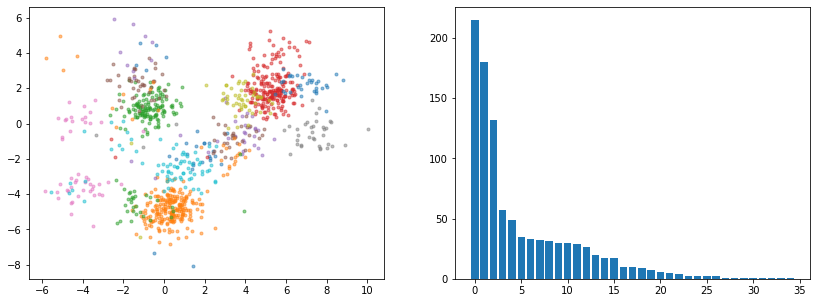

In [6]:
# Generate and plot the data
data = np.array(
    [[0, 0]], ndmin=2
)  # We need to initialize with something, but this will be deleted later.

plt.subplot(1, 2, 1)
for n in z:
    cluster_mean = stats.multivariate_normal.rvs(mean=prior_mean, cov=prior_cov, size=1)
    cluster_data = stats.multivariate_normal.rvs(
        mean=cluster_mean, cov=likelihood_cov, size=n
    )
    data = np.vstack([data, cluster_data])
    plt.plot(*cluster_data.T, ".", alpha=0.5)

plt.subplot(1, 2, 2)
plt.bar(list(range(len(z))), sorted(z, reverse=True))

data = data[1:]

## Fit model to data

In [7]:
# Instantiate a model
model = DirichletGaussianMixtureSampler(alpha, prior_cov, prior_mean, likelihood_cov, data, burn_in_iter=20)

In [8]:
# Perform a burn-in
model.burn_in()

100%|██████████| 20/20 [02:02<00:00,  6.12s/it]


In [11]:
# Sample
clusters = model.sample()

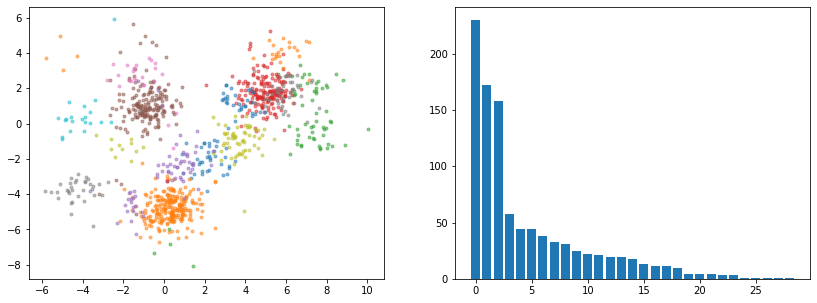

In [12]:
# See results
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
for k in range(clusters.shape[1]):
    plt.plot(*data[clusters[:, k] == 1].T, ".", alpha=0.5)
plt.subplot(1, 2, 2)
plt.bar(list(range(clusters.shape[1])), sorted(clusters.sum(axis=0), reverse=True));